In [1]:
from zipfile import ZipFile

In [2]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt

import time
from time import process_time

In [3]:
import os
import datetime
import numpy

import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorboard import notebook

import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

tf.keras.backend.clear_session()

In [4]:
print(sklearn.__version__)
print(tf.__version__)

1.0.2
2.8.0


## Q1

In [4]:
from cab420_a1b_q1_utils import *

In [5]:
# codes below are from the demo for the particular assignment 
train_X, train_Y, test_X, test_Y = load_data('CAB420_Assessment_1B_Data/Q1/q1_train.mat','CAB420_Assessment_1B_Data/Q1/q1_test.mat')
# check shape of data
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

# visualise images as a sanity check
#plot_images(train_X, train_Y)

(1000, 32, 32, 3)
(1000,)
(10000, 32, 32, 3)
(10000,)


## Linear One vs One SVM (with C = 1)

In [7]:
train_vector_X = vectorise(train_X)
test_vector_X = vectorise(test_X)
print(train_vector_X.shape)
print(test_vector_X.shape)
train_Y.shape

(1000, 3072)
(10000, 3072)


(1000,)

In [6]:
def eval_model_nondl(model, X_train, Y_train, X_test, Y_test, verbose = False):

    train_pred_start = time.process_time()
    pred = model.predict(X_train)
    train_pred_end = time.process_time()

    if (verbose):
        fig = plt.figure(figsize=[25, 8])
        ax = fig.add_subplot(1, 2, 1)
        conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)

        conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));

    test_pred_start = time.process_time()
    pred = model.predict(X_test)
    test_pred_end = time.process_time()
    test_acc = sum(pred == Y_test)/len(Y_test)

    if (verbose):
        ax = fig.add_subplot(1, 2, 2)
        conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
        conf.ax_.set_title('Testing Set Performance: ' + str(test_acc));

        print(classification_report(y_test, pred))
    
    return (train_pred_end - train_pred_start), (test_pred_end - test_pred_start), test_acc

def train_and_eval_nondl(model,x_train, y_train, x_test, y_test, verbose = False):

    train_start = time.process_time()
    model.fit(x_train, y_train)
    train_end = time.process_time()
    train_time = train_end - train_start

    pred_train_time, pred_test_time, acc = eval_model_nondl(model, x_train, y_train, x_test, y_test, verbose)
    
    return train_time, pred_train_time, pred_test_time, acc

In [7]:
def bulk_evaluate(x_train_vectorised, y_train, x_test_vectorised, y_test, verbose = False):
    onevsall_svm = OneVsOneClassifier(SVC(kernel = 'linear'))
    svm_metrics = train_and_eval_nondl(onevsall_svm, x_train_vectorised, y_train, x_test_vectorised, y_test, verbose)       
    
    return svm_metrics

In [10]:
time_1 = process_time()
print(bulk_evaluate(train_vector_X, train_Y, test_vector_X, test_Y))
time_2 = process_time()
print('Time to load data:   %f seconds' % (time_2 - time_1))

(4.2448809999999995, 16.705118, 165.84069699999998, 0.3392)
Time to load data:   186.840886 seconds


In [11]:
svm_500 = bulk_evaluate(train_vector_X[0:100, :, ], train_Y[0:100], test_vector_X, test_Y, verbose = False)
svm_1000 = bulk_evaluate(train_vector_X[0:200, :, ], train_Y[0:200], test_vector_X, test_Y, False)
svm_2000 = bulk_evaluate(train_vector_X[0:350, :, ], train_Y[0:350], test_vector_X, test_Y, False)
svm_5000 = bulk_evaluate(train_vector_X[0:500, :, ], train_Y[0:500], test_vector_X, test_Y, False)
svm_10000 = bulk_evaluate(train_vector_X[0:600, :, ], train_Y[0:600], test_vector_X, test_Y, False)
svm_20000 = bulk_evaluate(train_vector_X[0:800, :, ], train_Y[0:800], test_vector_X, test_Y, False)
svm_50000 = bulk_evaluate(train_vector_X[0:1000, :, ], train_Y[0:1000], test_vector_X, test_Y, False)

In [12]:
svm_results = numpy.vstack([svm_500, svm_1000, svm_2000, svm_5000, svm_10000, svm_20000, svm_50000])

samples = [100, 200, 350, 500, 600, 800, 1000]
samples2 = [1000, 1500, 2000, 4000, 6000, 8000, 10000]

NameError: name 'samples' is not defined

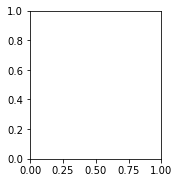

In [7]:
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(2, 3, 1)
ax.plot(samples, svm_results[:,0], label='SVM')
ax.set_title('Training Time as Dataset Size Changes')
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Runtime (s)')
ax.legend()


fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(2, 3, 1)
ax.plot(samples, svm_results[:,2], label='SVM')
ax.set_title('Test Set Evaluation Time as Dataset Size Changes')
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Runtime (s)')
ax.legend()


fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(2, 3, 1)
ax.plot(samples, svm_results[:,3], label='SVM')
ax.set_title('Test Set Accuracy as Dataset Size Changes')
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Accuracy')
ax.legend()


## DCNN model

### Train a model from scratch, using no data augmentation, on the provided abridged SVHN training set.

(1000, 32, 32)
(10000, 32, 32)


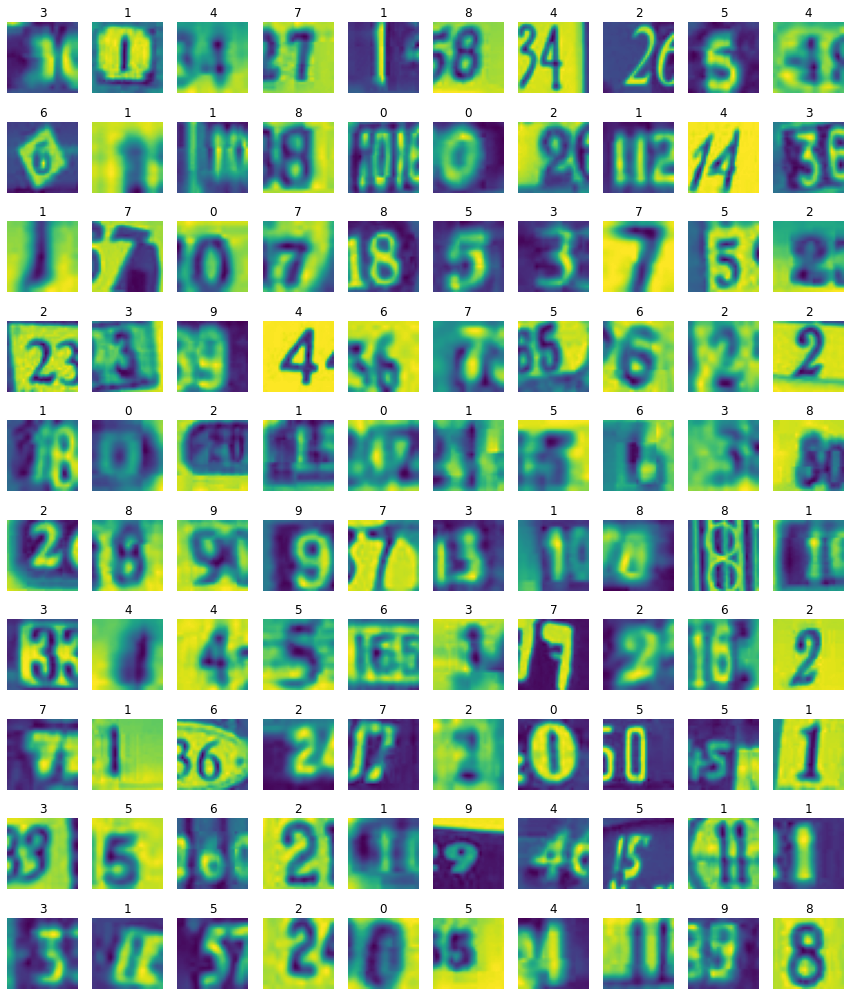

In [23]:
train_X_small = convert_to_grayscale(resize(train_X, (32, 32)))
print(train_X_small.shape)
plot_images(train_X_small, train_Y)

test_X_small = convert_to_grayscale(resize(test_X, (32, 32)))
print(test_X_small.shape)

In [15]:
# our input now has a different shape, 32x32x1, as we have 32x32 single channel images
inputs = keras.Input(shape=(32, 32, 3, ), name='img')
# rather than use a fully connected layer, we'll use 2D convolutional layers, 8 filters, 3x3 size kernels
x = layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu')(inputs)
# 2x2 max pooling, this will downsample the image by a factor of two
x = layers.MaxPool2D(pool_size=(2, 2))(x)
# more convolution, 16 filters, followed by max poool
x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
# final convolution, 32 filters
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
# a flatten layer. Matlab does a flatten automatically, here we need to explicitly do this. Basically we're telling
# keras to make the current network state into a 1D shape so we can pass it into a fully connected layer
x = layers.Flatten()(x)
# a single fully connected layer, 64 inputs
x = layers.Dense(64, activation='relu')(x)
# and now our output, same as last time
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print the summary
model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='Mo_data_aug_model')
model_cnn.summary()

Model: "Mo_data_aug_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)    

In [1]:
def plot_training(history):
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend();
    
def eval_model(model, x_test, y_test):
    test_scores = model.evaluate(x_test, y_test, verbose=2)
    print('Test loss:', test_scores[0])
    print('Test accuracy:', test_scores[1])

    pred = model.predict(x_test);
    indexes = tf.argmax(pred, axis=1)
    i = tf.cast([], tf.int32)
    indexes = tf.gather_nd(indexes, i)
    
    cm = confusion_matrix(y_test, indexes)
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(1, 1, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=range(10))
    c.plot(ax = ax)

In [2]:
time_3 = process_time()
model_cnn.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model_cnn.fit(train_X, train_Y,
                        batch_size=3,
                        epochs=10,
                        validation_data=(test_X, test_Y))

time_4 = process_time()
print('Time to load data:   %f seconds' % (time_4 - time_3))
# from_logits	Whether y_pred is expected to be a logits tensor. 
# By default, we assume that y_pred encodes a probability distribution.

NameError: name 'process_time' is not defined

313/313 - 2s - loss: 1.7553 - accuracy: 0.7949 - 2s/epoch - 5ms/step
Test loss: 1.755260944366455
Test accuracy: 0.7949000000953674
Time to load data:   7.543914 seconds


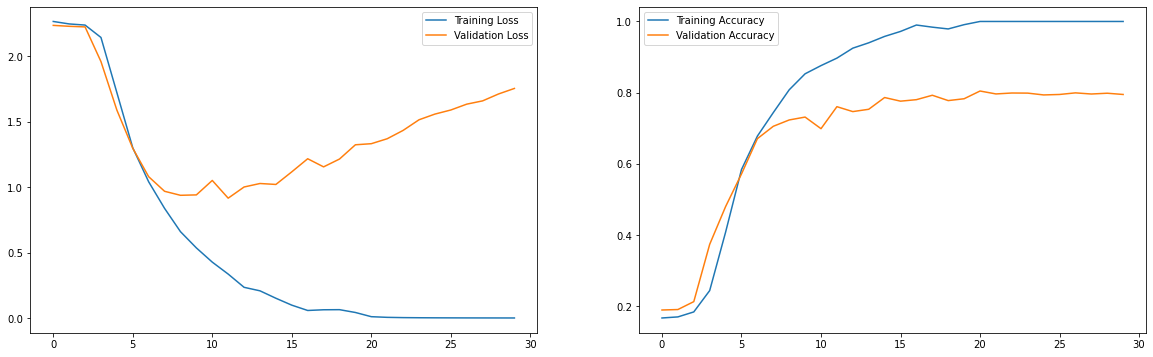

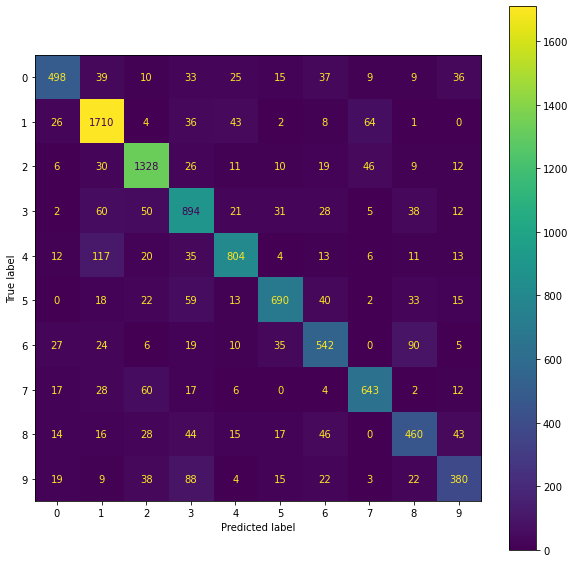

In [18]:

plot_training(history)

time_3 = process_time()

eval_model(model_cnn, test_X, test_Y)

time_4 = process_time()
print('Time to load data:   %f seconds' % (time_4 - time_3))

In [21]:
# with greyscale
# our input now has a different shape, 32x32x1, as we have 32x32 single channel images
inputs = keras.Input(shape=(32, 32, 1 ), name='img')
# rather than use a fully connected layer, we'll use 2D convolutional layers, 8 filters, 3x3 size kernels
x = layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu')(inputs)
# 2x2 max pooling, this will downsample the image by a factor of two
x = layers.MaxPool2D(pool_size=(2, 2))(x)
# more convolution, 16 filters, followed by max poool
x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
# final convolution, 32 filters
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
# a flatten layer. Matlab does a flatten automatically, here we need to explicitly do this. Basically we're telling
# keras to make the current network state into a 1D shape so we can pass it into a fully connected layer
x = layers.Flatten()(x)
# a single fully connected layer, 64 inputs
x = layers.Dense(64, activation='relu')(x)
# and now our output, same as last time
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print the summary
model_cnn_grey = keras.Model(inputs=inputs, outputs=outputs, name='Mo_data_aug_model')
model_cnn_grey.summary()

Model: "Mo_data_aug_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)    

Epoch 1/30


/Users/user/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


334/334 [==============================] - 9s 24ms/step - loss: 2.2643 - accuracy: 0.1570 - val_loss: 2.2488 - val_accuracy: 0.1647
Epoch 2/30
334/334 [==============================] - 7s 22ms/step - loss: 2.2385 - accuracy: 0.1620 - val_loss: 2.2142 - val_accuracy: 0.1894
Epoch 3/30
334/334 [==============================] - 7s 22ms/step - loss: 2.1751 - accuracy: 0.2050 - val_loss: 2.1363 - val_accuracy: 0.2189
Epoch 4/30
334/334 [==============================] - 7s 22ms/step - loss: 1.8710 - accuracy: 0.3450 - val_loss: 1.6040 - val_accuracy: 0.4574
Epoch 5/30
334/334 [==============================] - 7s 22ms/step - loss: 1.3962 - accuracy: 0.5160 - val_loss: 1.2766 - val_accuracy: 0.5848
Epoch 6/30
334/334 [==============================] - 7s 22ms/step - loss: 1.0428 - accuracy: 0.6760 - val_loss: 1.0517 - val_accuracy: 0.6707
Epoch 7/30
334/334 [==============================] - 7s 22ms/step - loss: 0.8376 - accuracy: 0.7340 - val_loss: 1.0387 - val_accuracy: 0.6728
Epoch 8/30

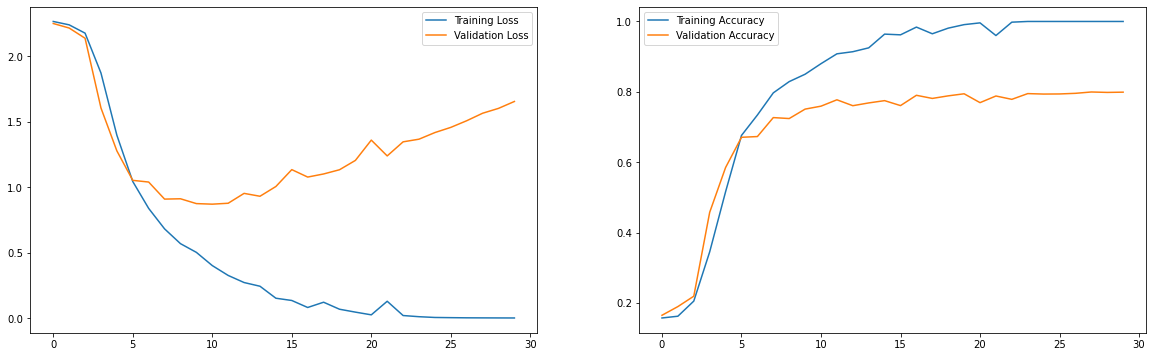

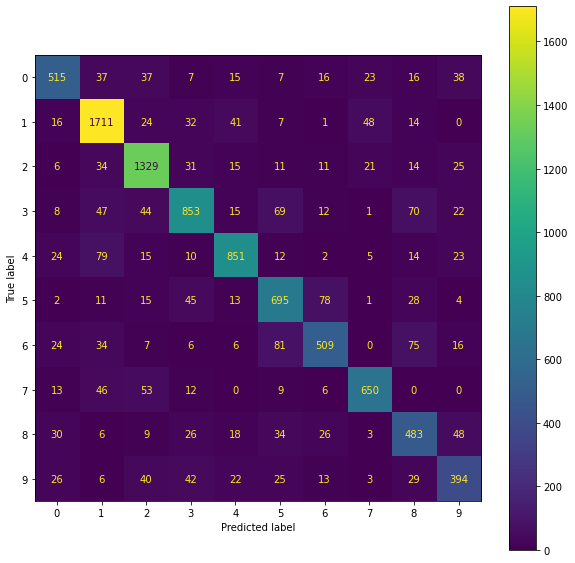

In [24]:
time_3 = process_time()
model_cnn_grey.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model_cnn_grey.fit(train_X_small, train_Y,
                        batch_size=3,
                        epochs=30,
                        validation_data=(test_X_small, test_Y))

time_4 = process_time()
print('Time to load data:   %f seconds' % (time_4 - time_3))
# from_logits	Whether y_pred is expected to be a logits tensor. 
# By default, we assume that y_pred encodes a probability distribution.


time_5 = process_time()
plot_training(history)
eval_model(model_cnn_grey, test_X_small, test_Y)

time_6 = process_time()
print('Time to load data:   %f seconds' % (time_6 - time_5))

Training accuract is below 20% there

## Addiding Auguentation 

- moderate translations
- small rotations
- moderate scale changes
- reflections on the X-axis

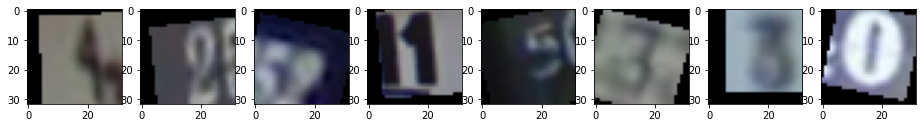

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                            # rotate between -15, +15 degrees
                            rotation_range=20,
                            # horiziontal shift by +/- 5% of the image width
                            width_shift_range=0.15,
                            # vertical shift by +/- 5% of the image width
                            height_shift_range=0.15,
                            # range for zooming
                            zoom_range=0.15,
                            # allow horizontal flips of data
                            # what value to place in new pixels, given the nature of our data (clothes on a black backround)
                            # we'll set this to a constant value of 0
                            #vertical_flip = True,
                            
                            fill_mode='constant', cval=0)

batch = datagen.flow(train_X, train_Y, batch_size=8)
fig = plt.figure(figsize=[20, 25])
for i,img in enumerate(batch[0][0]):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(img[:,:,:])

In [39]:
time_5 = process_time()


model_cnn.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model_cnn.fit(datagen.flow(train_X, train_Y, batch_size=3),
                    batch_size = 3,
                    epochs=30,
                    validation_data=(test_X, test_Y))

time_6 = process_time()
print('Time to load data:   %f seconds' % (time_6 - time_5))

Epoch 1/30


/Users/user/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


334/334 [==============================] - 11s 30ms/step - loss: 1.0782 - accuracy: 0.6790 - val_loss: 0.6013 - val_accuracy: 0.8243
Epoch 2/30
334/334 [==============================] - 8s 24ms/step - loss: 0.9353 - accuracy: 0.7120 - val_loss: 0.6032 - val_accuracy: 0.8185
Epoch 3/30
334/334 [==============================] - 8s 24ms/step - loss: 0.9215 - accuracy: 0.7350 - val_loss: 0.6644 - val_accuracy: 0.8008
Epoch 4/30
334/334 [==============================] - 8s 23ms/step - loss: 0.8267 - accuracy: 0.7340 - val_loss: 0.6026 - val_accuracy: 0.8131
Epoch 5/30
334/334 [==============================] - 8s 23ms/step - loss: 0.9008 - accuracy: 0.7050 - val_loss: 0.6163 - val_accuracy: 0.8070
Epoch 6/30
334/334 [==============================] - 8s 24ms/step - loss: 0.8398 - accuracy: 0.7120 - val_loss: 0.6296 - val_accuracy: 0.8120
Epoch 7/30
334/334 [==============================] - 8s 23ms/step - loss: 0.8509 - accuracy: 0.7280 - val_loss: 0.6043 - val_accuracy: 0.8224
Epoch 8/3

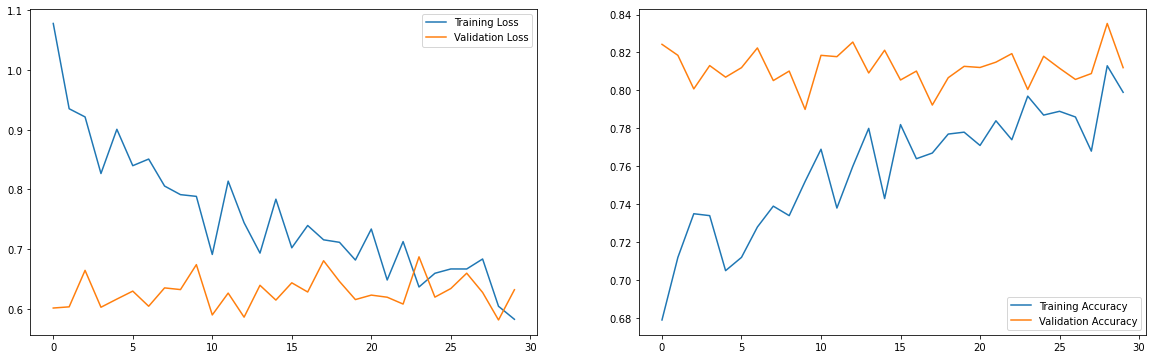

In [40]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label="Training Loss")
ax.plot(history.history['val_loss'], label="Validation Loss")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label="Training Accuracy")
ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
ax.legend()

313/313 - 2s - loss: 0.6319 - accuracy: 0.8120 - 2s/epoch - 5ms/step
Test loss: 0.6319094896316528
Test accuracy: 0.8119999766349792
Time to load data:   7.819406 seconds


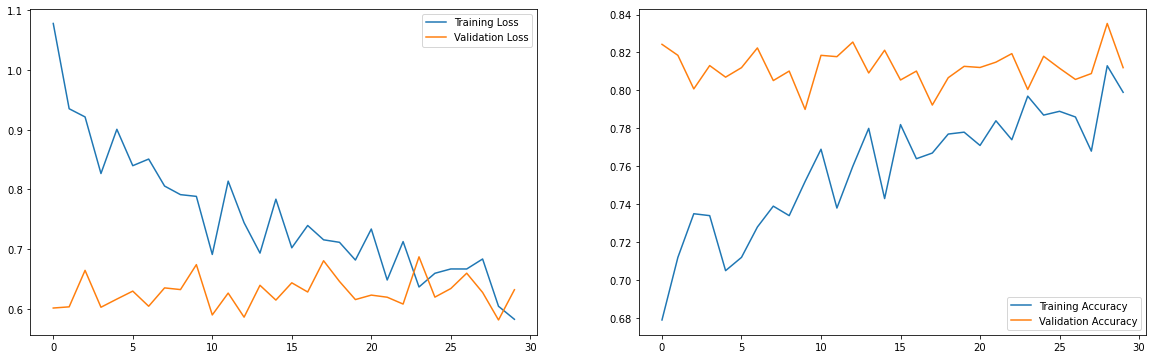

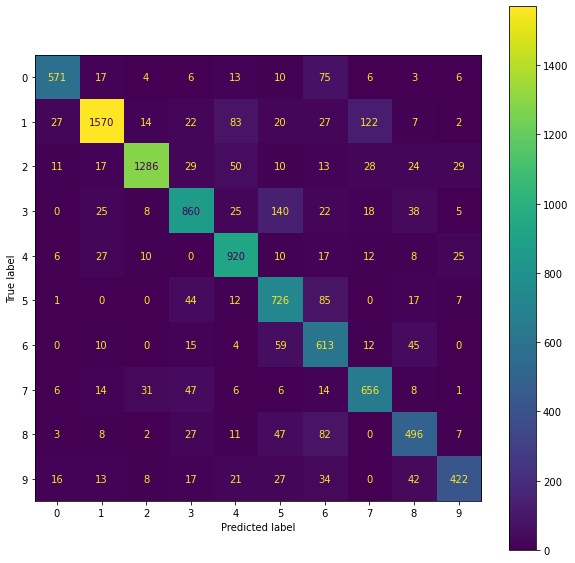

In [41]:
plot_training(history)

time_5 = process_time()

eval_model(model_cnn, test_X, test_Y)
time_6 = process_time()
print('Time to load data:   %f seconds' % (time_6 - time_5))

In [42]:
grey_train_X = np.expand_dims(train_X_small, axis=-1)
#print(y.shape)
grey_test_X = np.expand_dims(test_X_small, axis=-1)
#print(y.shape)

Epoch 1/30


/Users/user/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


334/334 [==============================] - 9s 27ms/step - loss: 1.0507 - accuracy: 0.6980 - val_loss: 0.6266 - val_accuracy: 0.8199
Epoch 2/30
334/334 [==============================] - 9s 26ms/step - loss: 0.9405 - accuracy: 0.7070 - val_loss: 0.6110 - val_accuracy: 0.8255
Epoch 3/30
334/334 [==============================] - 9s 26ms/step - loss: 0.9235 - accuracy: 0.7020 - val_loss: 0.6630 - val_accuracy: 0.8043
Epoch 4/30
334/334 [==============================] - 9s 26ms/step - loss: 0.9094 - accuracy: 0.7070 - val_loss: 0.6243 - val_accuracy: 0.8200
Epoch 5/30
334/334 [==============================] - 8s 22ms/step - loss: 0.8941 - accuracy: 0.6960 - val_loss: 0.6598 - val_accuracy: 0.8047
Epoch 6/30
334/334 [==============================] - 7s 22ms/step - loss: 0.8847 - accuracy: 0.7010 - val_loss: 0.7026 - val_accuracy: 0.7930
Epoch 7/30
334/334 [==============================] - 8s 23ms/step - loss: 0.8394 - accuracy: 0.7260 - val_loss: 0.6123 - val_accuracy: 0.8244
Epoch 8/30

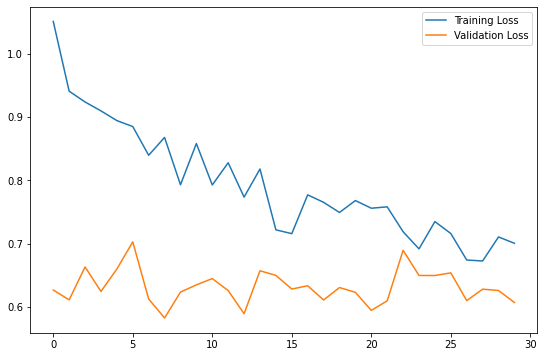

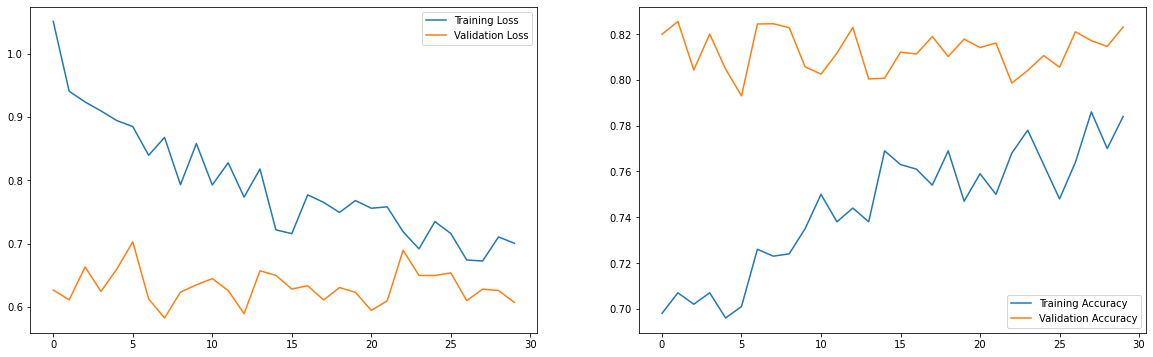

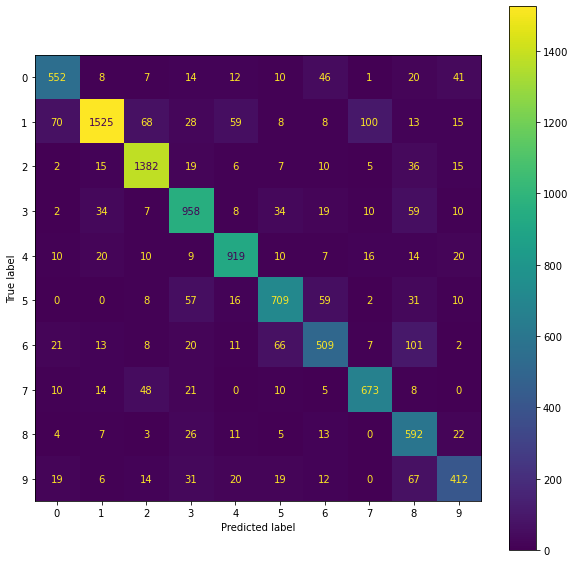

In [43]:
# data Aug with greyscale
time_5 = process_time()


model_cnn_grey.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model_cnn_grey.fit(datagen.flow(grey_train_X, train_Y, batch_size=3),
                    batch_size = 3,
                    epochs=30,
                    validation_data=(grey_test_X, test_Y))

time_6 = process_time()
print('Time to load data:   %f seconds' % (time_6 - time_5))

fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label="Training Loss")
ax.plot(history.history['val_loss'], label="Validation Loss")
ax.legend()

plot_training(history)

time_7 = process_time()
eval_model(model_cnn_grey, grey_test_X, test_Y)

time_8 = process_time()
print('Time to load data:   %f seconds' % (time_7 - time_8))

313/313 - 1s - loss: 0.7412 - accuracy: 0.8089 - 1s/epoch - 4ms/step
Test loss: 0.7411656379699707
Test accuracy: 0.808899998664856


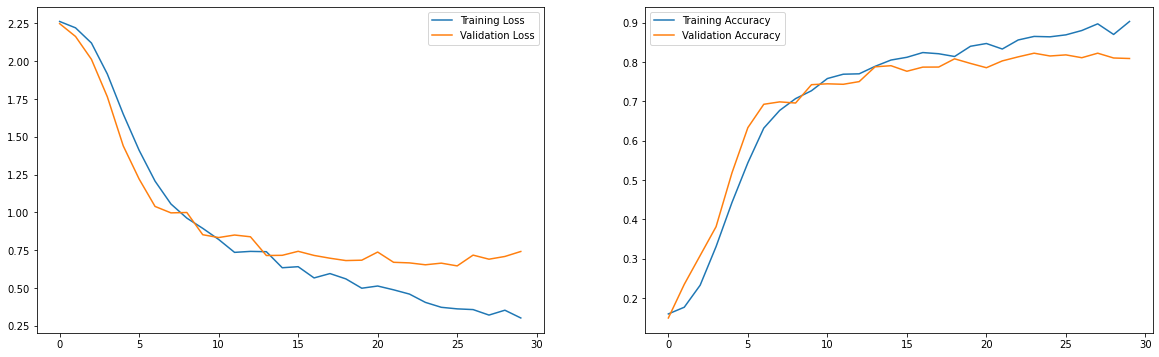

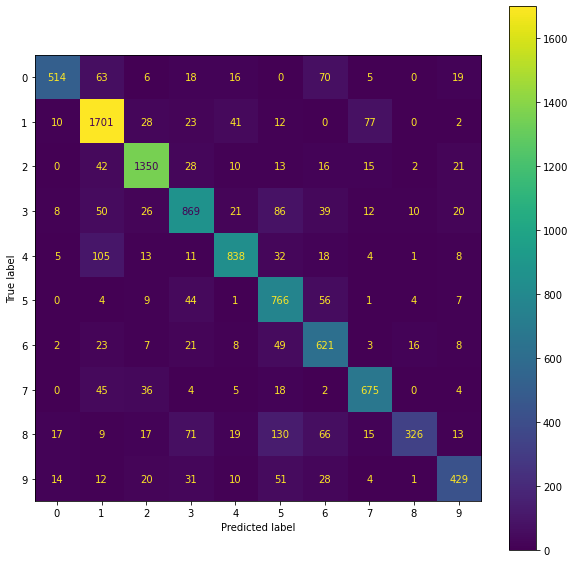

In [15]:
plot_training(history)
eval_model(model_cnn_grey, grey_test_X, test_Y)

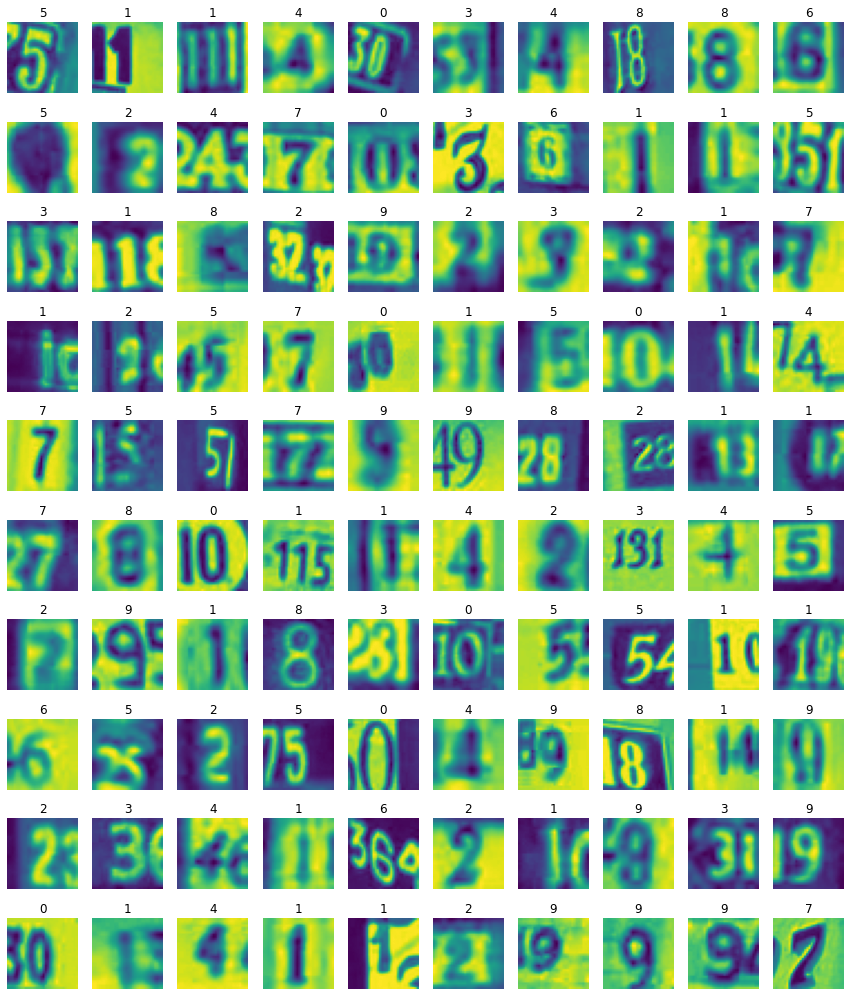

In [34]:
plot_images(grey_test_X, test_Y)

## SparseCategoricalCrossentropy(from_logits=False)?

We have the following above when we compile our network:

model_cnn.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

What exactly are we doing here? Aren't we using regular categorical cross-entropy?

What we've done is taken a shortcut with our data wrangling. We have a 10 class problem, and so we have an output of size 10, where we expect the correct class to be set to 1, and all others 0 (a one-hot vector). Our target data though, is a list of numbers - i.e. we haven't converted it into a one-hot representation. Hence, we are using the SparseCategoricalCrossentropy loss which will do that conversion for us on the fly. If we had done the conversion, we would use regular CategoricalCrossentropy.

As for the from_logits=False, this comes down to whether we've applied a softmax layer or not at our output. If we haven't, then we'd set from_logits=True and again, our loss function would take care of the details for us and apply the softmax on the fly. For the sake of demonstration, we'll set the next model up with no softmax and use from_logits=True.

## Fine tuning
Is essentially recycling the data set and use it by changing the layers a bit. 
- and train quicker 

## We are using Fashion MNIST for out fine tuning model

In [7]:
model_FT = keras.models.load_model('../../trained_models_keras_vgg/vgg_2stage_CIFAR_bigger.h5')
model_FT.summary()

Model: "simple_vgg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_37 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 activation_37 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 spatial_dropout2d_22 (Spati  (None, 32, 32, 16)       0         
 alDropout2D)                                           

In [8]:
for layer in model_FT.layers[:-15]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in model_FT.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f8d0f023c40> False
<keras.layers.convolutional.Conv2D object at 0x7f8d0f00f070> False
<keras.layers.convolutional.Conv2D object at 0x7f8d0f00f970> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f8d0f00f190> False
<keras.layers.core.activation.Activation object at 0x7f8d0f016c40> False
<keras.layers.core.spatial_dropout.SpatialDropout2D object at 0x7f8d0f0162e0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8d0f016430> False
<keras.layers.convolutional.Conv2D object at 0x7f8d0f001730> True
<keras.layers.convolutional.Conv2D object at 0x7f8d0f001be0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f8d0f001b20> True
<keras.layers.core.activation.Activation object at 0x7f8d0f007700> True
<keras.layers.core.spatial_dropout.SpatialDropout2D object at 0x7f8d0f007400> True
<keras.layers.core.flatten.Flatten object at 0x7f8d0f0078b0> True
<keras.layers.core.dens

for layer in model_FT.layers[:-5]:
    layer.trainable = False

for layer in model_FT.layers:
    print(layer, layer.trainable)

In [9]:
train_X_small = convert_to_grayscale(resize(train_X, (28, 28)))
print(train_X_small.shape)
#plot_images(train_X_small, train_Y)

test_X_small = convert_to_grayscale(resize(test_X, (28, 28)))
print(test_X_small.shape)

grey_train_X = np.expand_dims(train_X_small, axis=-1)
print(grey_train_X.shape)
grey_test_X = np.expand_dims(test_X_small, axis=-1)
#print(y.shape)

(1000, 28, 28)
(10000, 28, 28)
(1000, 28, 28, 1)


In [10]:
time_7 = process_time()

model_FT.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
history = model_FT.fit(train_X, train_Y,
          batch_size=20,
          epochs=20,
          validation_data=(test_X, test_Y))
plot_training(history)
eval_model(model_FT, test_X, test_Y)

time_8 = process_time()
print('Time to load data:   %f seconds' % (time_8 - time_7))

Epoch 1/20
50/50 [==============================] - 15s 285ms/step - loss: 5.1133 - accuracy: 0.1070 - val_loss: 3.9662 - val_accuracy: 0.1449
Epoch 2/20
50/50 [==============================] - 13s 259ms/step - loss: 3.4929 - accuracy: 0.1850 - val_loss: 3.2772 - val_accuracy: 0.1846
Epoch 3/20
50/50 [==============================] - 12s 249ms/step - loss: 2.9456 - accuracy: 0.2230 - val_loss: 2.6312 - val_accuracy: 0.2447
Epoch 4/20
50/50 [==============================] - 12s 251ms/step - loss: 2.6280 - accuracy: 0.2640 - val_loss: 2.3656 - val_accuracy: 0.2933
Epoch 5/20
50/50 [==============================] - 16s 316ms/step - loss: 2.3639 - accuracy: 0.3110 - val_loss: 2.1653 - val_accuracy: 0.3227
Epoch 6/20
50/50 [==============================] - 17s 341ms/step - loss: 2.1256 - accuracy: 0.3520 - val_loss: 2.0876 - val_accuracy: 0.3445
Epoch 7/20
50/50 [==============================] - 13s 255ms/step - loss: 2.0929 - accuracy: 0.3550 - val_loss: 1.9603 - val_accuracy: 0.3780

NameError: name 'plot_training' is not defined

Epoch 1/30
50/50 [==============================] - 14s 263ms/step - loss: 2.3634 - accuracy: 0.3020 - val_loss: 1.4942 - val_accuracy: 0.5387
Epoch 2/30
50/50 [==============================] - 13s 256ms/step - loss: 1.8459 - accuracy: 0.3910 - val_loss: 1.3335 - val_accuracy: 0.5594
Epoch 3/30
50/50 [==============================] - 13s 258ms/step - loss: 1.6945 - accuracy: 0.4260 - val_loss: 1.1883 - val_accuracy: 0.6057
Epoch 4/30
50/50 [==============================] - 13s 265ms/step - loss: 1.5532 - accuracy: 0.4780 - val_loss: 1.1607 - val_accuracy: 0.6258
Epoch 5/30
50/50 [==============================] - 13s 257ms/step - loss: 1.4725 - accuracy: 0.4990 - val_loss: 0.9977 - val_accuracy: 0.6781
Epoch 6/30
50/50 [==============================] - 12s 250ms/step - loss: 1.3459 - accuracy: 0.5600 - val_loss: 1.0022 - val_accuracy: 0.6670
Epoch 7/30
50/50 [==============================] - 12s 248ms/step - loss: 1.2986 - accuracy: 0.5700 - val_loss: 0.8756 - val_accuracy: 0.7159

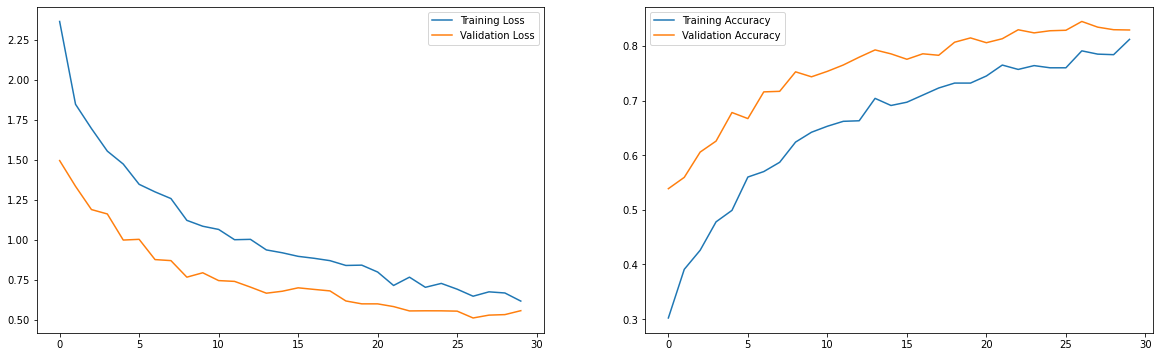

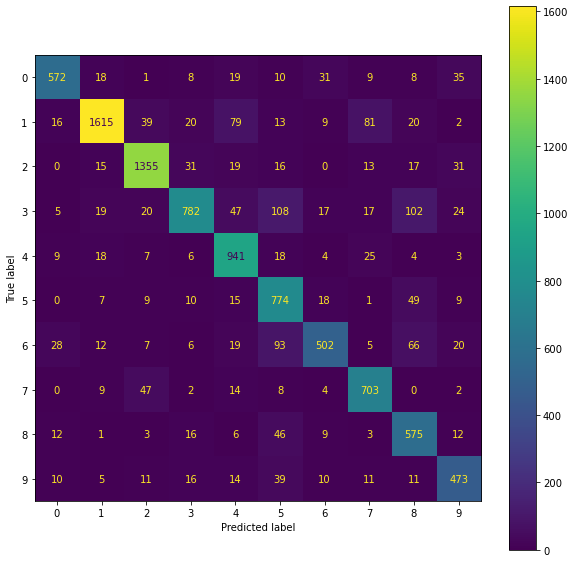

In [14]:
time_7 = process_time()

model_FT.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model_FT.fit(datagen.flow(train_X, train_Y, batch_size=20),
                    batch_size = 40,
                    epochs=30,
                    validation_data=(test_X, test_Y))
plot_training(history)
eval_model(model_FT, test_X, test_Y)


time_8 = process_time()
print('Time to load data:   %f seconds' % (time_8 - time_7))

In [24]:
grey_train_X = grey_train_X.resize((28, 28))
grey_test_X = grey_test_X.resize((28, 28))

ValueError: cannot resize this array: it does not own its data